# Agenda

- types of learning - supervised vs unsupervised
- cleaning and encoding data
- exploratory analysis
- training vs test data
- evaluating models
- feature engineering and synthesis
- pitfalls and trade-offs
- tuning and improving results
- interpreting results
- deep learning - why the hype?

while illustrating the workflow of an ML practitioner. In 30 minutes - whew!

# Why Me?

- several years experience as a data science practitioner, tool builder, and manager
- I am _not_ a stats Ph.D. or researcher - but I have some real world experience from eBay (measured in hundreds of millions of dollars GMV impact - mostly positive :-))

*__Machine Learning__ is the process of algorithmically building models from data, either to gain insight into the data or to make predictions for __new__ data (generalization).*

If we didn't need to generalize to new cases we could just use a hash table.

## Supervised Learning

The _corpus_ or data (training data) is labeled with a known outcome (this is the supervision part), and the aim is to predict new outcomes from new data.

- if the outcome is a category this is _classification_ (_binary classification_ if two classes). Output may be a single class or a set of probabilities.
- if the outcome is a continuous quantity this is _regression_


## Unsupervised Learning

The data is analyzed for underlying patterns to gain insight, such as:

- _clustering_ - finding similar cases based on some _distance metric_ (e.g. recommendations)
- _outlier detection_ or _anomaly detection_ - finding unusual cases (e.g. fraud detection)
- _dimensionality reduction_ - reducing the number of variables needed to represent the data, essentially a form of lossy compression

# ML Input 

The data used in ML is typically tabular:

- columns are called *features* and the output column (if any) the *target* or *label*. 
- rows are *instances* or *observations*


In [2]:
%matplotlib inline
import seaborn as sns; 
#sns.set(style="ticks", color_codes=True)


In [12]:
import pandas as pd
titanic = pd.read_excel('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls')
for k in ["sibsp", "parch", "ticket", "fare", "embarked", "boat", "body", "home.dest"]:
    del titanic[k]


In [13]:
titanic

,pclass,survived,name,sex,age,cabin
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,B5
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,C22 C26
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,C22 C26
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,C22 C26
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,C22 C26
5,1,1,"Anderson, Mr. Harry",male,48.0000,E12
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,D7
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,A36
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,C101
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,NaN


# Models

We'll often refer to the features of an observation as a vector __`X`__ and the target as `y`
and say that we're trying to find a function or _model_ `f` that approximates `f(`__`X`__`) = y`

Once found, the model is characterized by some *model parameters*.

E.g. in _linear regression_ the model will have the form `f(X)=M.X + c` where the vector `M` and constant `c` are the learned parameters.

We usually choose the type or class of model, and then use ML techniques to learn the model parameters that minimize the *error* (the difference between the predicted and actual output). 

# Loss Functions

More generally we can think of this as an optimization problem, where we are trying to learn the parameters that minimize a *loss function*; that loss function is typically going to be some cumulative function of the errors; a common loss function is RMSE (root mean square of errors).

# Shaping the Data

We are trying to predict _hours_ of monthly usage from the number of months following the training. So we need to reshape the data to just two columns: month (__`X`__) and hours (`y`).

Go research _tidy data_ to learn more.

# Encoding Data Appropriately

Most ML algorithms rely on the inputs being numeric quantities. So we need to convert categorical/textual data.

A common approach is *1-hot encoding*: add a new column for every unique value of that categorical variable, and then encode the values in those columns as 0/1.

For text, we would drop common words like "the" and "and" (_stop words_), and refer to this as _bag of words_.

# 1-Hot Text Example

    the cat sat on the mat
    the rat doesn't like the cat
    the mat belongs to the rat

Drop stop words "the", "on", "to".

    belongs doesn't cat like mat rat sat
    0       0       1   0    1   0   0
    0       1       1   1    0   1   0
    1       0       0   0    1   1   0


# Hyperparameters

While we learn the model parameters, there are some other parameters we need to specify as inputs to the model too; these are called *hyperparameters*. For example, if we learn a decision tree model, the parameters might be the features being tested at each branch and the values they are being tested against, while the hyperparameters would include the depth that we want to limit the tree to. For a polynomial regression model, the parameters would be the coefficients of the polynomial, while the hyperparameters could include the degree of polynomial we want to learn.

# Cleaning the Data

Data is rarely clean. We need to do things like:

- handle _missing values_ (use mean/median, infer from neighbors, or drop observation)
- normalize values (e.g scale to range [0,1], or to have mean 0 and stddev 1.0)
- remove _outliers_ - e.g. drop top and bottom percentiles, or values more than (say) 3 standard deviations from mean
- removing remaining bad observations
- for text, removing common _stop words_, normalizing case, _stemming_ and _lemmatization_

# Exploratory Analysis

We start with some exploratory analysis of the data. If the number of features is not too high we use a *pairplot* or *scatter matrix*, which plots multiple pairwise scatterplots for each combination of pairs of features, as well as the distribution of each feature. 

We're looking for several things: 

- features that are strongly correlated (or strongly inversely correlated) - we may be able to exclude one to simplify
- obvious clusters, that may be linearly separable - so we can use simple linear models
- features which seem correlated counter-intuitively - may indicate important missing features (*confounding variables*). E.g. daily ice cream consumption and drive-by shooting rates.
- are the distributions Gaussian (normal)? Some techniques expect that.

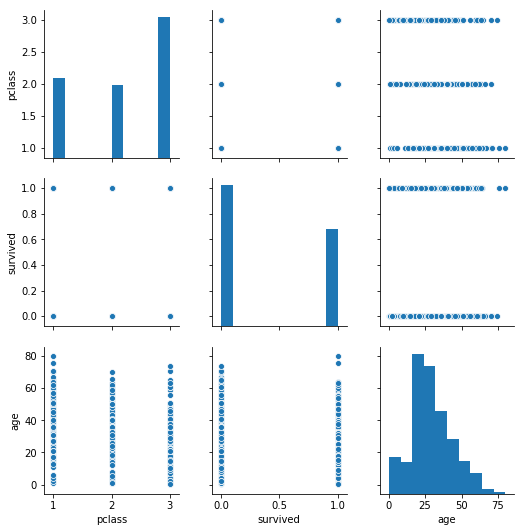

In [4]:
sns.pairplot(titanic.dropna())

In [ ]:
# TODO - do a pairplot of iris dataset

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(figsize=(8, 5)):
    fig = plt.figure(figsize=figsize)
    survived = titanic[titanic.survived == 1]
    died = titanic[titanic.survived == 0]
    plt.scatter(died.age, died.pclass, alpha=0.4, color='red')
    plt.scatter(survived.age, survived.pclass, s=10, alpha=0.4, color="blue")
    plt.xlim((0, 100))
    plt.ylabel('pclass')
    plt.xlabel('age')

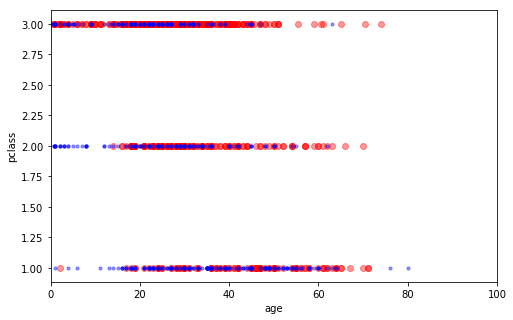

In [5]:
plot_data()

[Text(167.4, 181.2, 'X[1] <= 2.5\nentropy = 0.483\nsamples = 1046\nvalue = [619, 427]'),
 Text(83.7, 108.72, 'X[0] <= 15.5\nentropy = 0.496\nsamples = 545\nvalue = [249, 296]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.5\nsamples = 509\nvalue = [247, 262]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 5.5\nentropy = 0.386\nsamples = 501\nvalue = [370, 131]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.5\nsamples = 37\nvalue = [18, 19]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.366\nsamples = 464\nvalue = [352, 112]')]

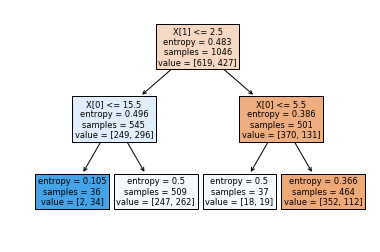

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd


titanic = pd.read_excel('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls')[["age", "pclass", "survived"]]
titanic = titanic.dropna()
X = titanic[["age", "pclass"]]
y = titanic.survived
est = DecisionTreeClassifier(max_depth=2).fit(X, y)

plot_tree(est, filled=True)

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Measuring a Classifier - The Confusion Matrix

A way to see how well we have done is to use a *[confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)* that plots counts of predicted vs actual values. This is usually only useful for a small number of classes or it becomes hard to understand. 

[[352 267]
 [112 315]]


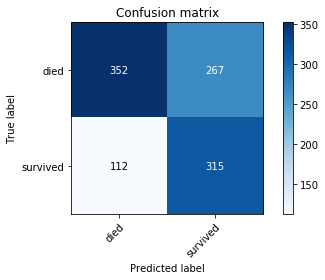

In [25]:
y_pred = est.predict(X)

plot_confusion_matrix(y, y_pred, classes=np.array(["died", "survived"]),
                      title='Confusion matrix')

In [26]:
titanic["y_pred"] = y_pred

In [35]:
titanic[(titanic.y_pred == 0) & (titanic.pclass == 2)]

,age,pclass,survived,y_pred


# Type 1 and Type 2 Errors

# Measuring a Classifier - Precision and Recall



[Text(144.3714285714286, 205.35999999999999, 'X[1] <= 2.5\nentropy = 0.483\nsamples = 1046\nvalue = [619, 427]'),
 Text(63.99285714285715, 181.2, 'X[0] <= 15.5\nentropy = 0.496\nsamples = 545\nvalue = [249, 296]'),
 Text(21.25714285714286, 157.04, 'X[0] <= 13.5\nentropy = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(14.171428571428573, 132.88, 'X[1] <= 1.5\nentropy = 0.062\nsamples = 31\nvalue = [1, 30]'),
 Text(10.62857142857143, 108.72, 'X[0] <= 3.0\nentropy = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(7.085714285714286, 84.56, 'X[0] <= 1.458\nentropy = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(3.542857142857143, 60.400000000000006, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(10.62857142857143, 60.400000000000006, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(14.171428571428573, 84.56, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(17.714285714285715, 108.72, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(28.342857142857145, 132.88, 'X[0] <= 14.5\nentr

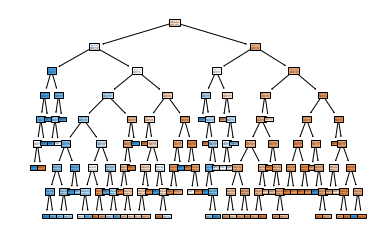

In [26]:
est = DecisionTreeClassifier(max_depth=8).fit(X, y)
plot_tree(est, filled=True)

[[532  87]
 [199 228]]


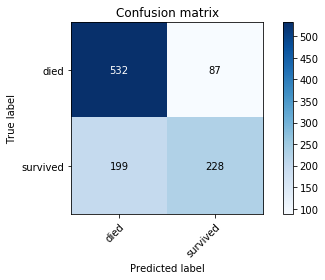

In [27]:
y_pred = est.predict(X)
plot_confusion_matrix(y, y_pred, classes=np.array(["died", "survived"]),
                      title='Confusion matrix')

In [ ]:
est = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

In [7]:
import numpy as np
import pandas as pd
from IPython.display import Markdown

df = pd.DataFrame(
    {
        "Jan": [4, 2, 2, 3, 1, 2],
        "Feb": [6, 4, 6, 5, 3, 4],
        "Mar": [12, 10, 11, 8, 6, 6],
        "Apr": [30, 24, 29, 23, 19, 2],
        "May": [60, 44, 64, 56, 39, 0],
        "Jun": [90, 70, 98, 78, 73, 0]
    },
    index = ["Jane", "Amy", "Lynn", "Diego", "Venki", "Sam"]
)
df

,Jan,Feb,Mar,Apr,May,Jun
Jane,4,6,12,30,60,90
Amy,2,4,10,24,44,70
Lynn,2,6,11,29,64,98
Diego,3,5,8,23,56,78
Venki,1,3,6,19,39,73
Sam,2,4,6,2,0,0


# Example

Several seniors are trained in using the Internet, and their online hours are tracked for 6 months. We want to predict how many hours per months other seniors trained this way will use.


In [2]:
df

,Jan,Feb,Mar,Apr,May,Jun
Jane,4,6,12,30,60,90
Amy,2,4,10,24,44,70
Lynn,2,6,11,29,64,98
Diego,3,5,8,23,56,78
Venki,1,3,6,19,39,73
Sam,2,4,9,21,40,77


In [3]:
Markdown(f"""<div>{df.to_html()}</div>""")

<div><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Jan</th>
      <th>Feb</th>
      <th>Mar</th>
      <th>Apr</th>
      <th>May</th>
      <th>Jun</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Jane</th>
      <td>4</td>
      <td>6</td>
      <td>12</td>
      <td>30</td>
      <td>60</td>
      <td>90</td>
    </tr>
    <tr>
      <th>Amy</th>
      <td>2</td>
      <td>4</td>
      <td>10</td>
      <td>24</td>
      <td>44</td>
      <td>70</td>
    </tr>
    <tr>
      <th>Lynn</th>
      <td>2</td>
      <td>6</td>
      <td>11</td>
      <td>29</td>
      <td>64</td>
      <td>98</td>
    </tr>
    <tr>
      <th>Diego</th>
      <td>3</td>
      <td>5</td>
      <td>8</td>
      <td>23</td>
      <td>56</td>
      <td>78</td>
    </tr>
    <tr>
      <th>Venki</th>
      <td>1</td>
      <td>3</td>
      <td>6</td>
      <td>19</td>
      <td>39</td>
      <td>73</td>
    </tr>
    <tr>
      <th>Sam</th>
      <td>2</td>
      <td>4</td>
      <td>9</td>
      <td>21</td>
      <td>40</td>
      <td>77</td>
    </tr>
  </tbody>
</table></div>

In [62]:
df2 = pd.DataFrame(
    [
        # Jane
        [1,4],
        [2,6],
        [3,12],
        [4,30],
        [5,60],
        [6,90],
        
        # Amy
        [1,2],
        [2,4],
        [3,10],
        [4,24],
        [5,44],
        [6,70],
        
        # Lynn
        [1,2],
        [2,6],
        [3,11],
        [4,29],
        [5,64],
        [6,98],
        
        # Diego
        [1,3],
        [2,5],
        [3,8],
        [4,23],
        [5,56],
        [6,78],
        
        # Venki
        [1,1],
        [2,3],
        [3,6],
        [4,19],
        [5,39],
        [6,73],
        
        # Sam
        [1, 2],
        [2, 4],
        [3, 6],
        [4, 2],
        [5, 0],
        [6, 0]
    ],
    columns = ["Month", "Hours"]
)


In [5]:
df2

,Month,Hours
0,1,4
1,2,6
2,3,12
3,4,30
4,5,60
5,6,90
6,1,2
7,2,4
8,3,10
9,4,24


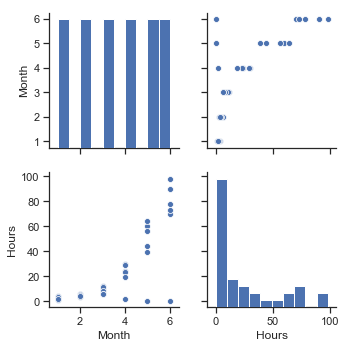

In [9]:
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(df2)

In [63]:
# Drop the outlier Sam

df2 = df2[:30]
df2

,Month,Hours
0,1,4
1,2,6
2,3,12
3,4,30
4,5,60
5,6,90
6,1,2
7,2,4
8,3,10
9,4,24


# Overfitting

- Say we just made a hash table of input features to labels. A 100% accurate model!...on the training data.
- This would fail terribly on new data it hasn't seen
- Fitting past data at the expense of generalizing to new data is "overfitting"
- A lesson is: don't train on your test data
- Except...



# Splitting the Data

For supervised learning, we need some test data, so we split the data we have into _training data_ and _test data_.

80/20 is a common ratio.

In [64]:
from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test = train_test_split(df2.Month, df2.Hours, test_size=0.2, random_state=0)


# Improving Model Performance

- _bias_ is a measure of the error of the model against the training set; high bias means underfitting
- _variance_ is a measure of how sensitive the model is to training data noise; high variance means overfitting

If our model performs poorly, we could try get more data or add more features, or we could:

- use a more complex model to get a better fit to training data, at the risk of overfitting (reduce bias, increase variance)
- use a simpler model because we may have overfit the training data (increase bias, reduce variance)

# Adding Features

We often have other data we can use as features, from past history. E.g. at eBay, we want:

`delivery_days = f(from_zip, to_zip, item category, item weight, shipping service, seller)`

but we have historical data like mean delivery days per service for different days of the week, mean and standard deviation of past handling times by seller, etc etc. Also we have distance between zips, rural vs urban area, etc.
In fact the delivery estimate model used nearly 50 features.

There are systems that can automate some of this _feature synthesis_.

# Adding Data - the Learning Curve

Assuming we capture the complexity of the data we are modeling, at some point we should have diminishing returns where adding more data doesn't significantly improve the model. This means that if we have a lot of data, it can be useful to measure how well the model is doing as we are training it, so we can stop when we reach the point where the further improvements are negligible. If we plot the training and validation scores as a function of the size of the data set we get the *learning curve*.

We would expect that a model will overfit a small dataset and underfit a large dataset, where 'small' and 'large' are dependent on the complexity of the model. We would also expect in almost every case that the training score is better than the validation score(or equivalently the training error is lower than the validation error). So a typical learning curve will look like:

![Learning Curve](img/learning-curve.png)

Note that the curve converges to some score as the amount of data increases. If the error score for the training set is high, that is high bias; if the scores for test and training are similar we have low variance, but a large gap between them is high variance.

# Cross-Validation

Let's say we split the data in half; call the two halves H1 and H2. We could train a model on H1 and test it on H2, and get an accuracy A1. We could train a second model on H2 and test it on H1, and get an accuracy of A2. This suggests that if we train a model using all the data, the accuracy when tested on new data should be somewhere between A1 and A2.

In practice, we don't split in half. More generally, we will split the data into k pieces of folds,  𝐹1 ,  𝐹2 , ...,  𝐹𝑘 , and then build  𝑘  models, where the  𝑛 th model uses  𝐹𝑛  as the test set and the remaining pieces excluding  𝐹𝑛  as the training set. The  𝑘  individual scores are then combined into a final score (mean and standard deviation). This is called k-fold cross validation. The size of each fold must be large enough to be a reasonable sample of the problem, while allowing enough repetitions of the train-test evaluation of the algorithm to provide a fair estimate of the algorithms performance on new data. Commonly-used values for k are 5 or 10, although we can go all the way to the extreme where  𝑘  is the size of the training set; this is called leave-one-out cross validation. It is computationally expensive and the results have high variance.

# The Bias-Variance Trade-Off

If we increased the complexity of our model, it would do better and better at fitting the training data, but at some point would start getting worse and worse at fitting the test data. This is the *bias-variance trade-off*; you can see it in the plot below where the vertical dashes line is the sweet spot we want to find.

![Bias-Variance Trade-Off](img/bias-variance.png)

# Ensembles, Bagging and Boosting

# The "best" model may not be best

In general we are looking for models that are as accurate as possible, but there are exceptions:
    
- model performance may be an issue. Do we have latency or QPS constraints?
- what is the cost (or value) of a Type 1 or Type 2 error?
- do we need the model predictions to be interpretable?
 

# What about Deep Learning?

neural networks are capable of modeling any continuous function, but they usually need lots of data and massive compute. 
transfer learning is a way around this.